In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
X_train = X_train.reshape(-1, 32 * 32 * 3)
X_test = X_test.reshape(-1, 32 * 32 * 3)

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

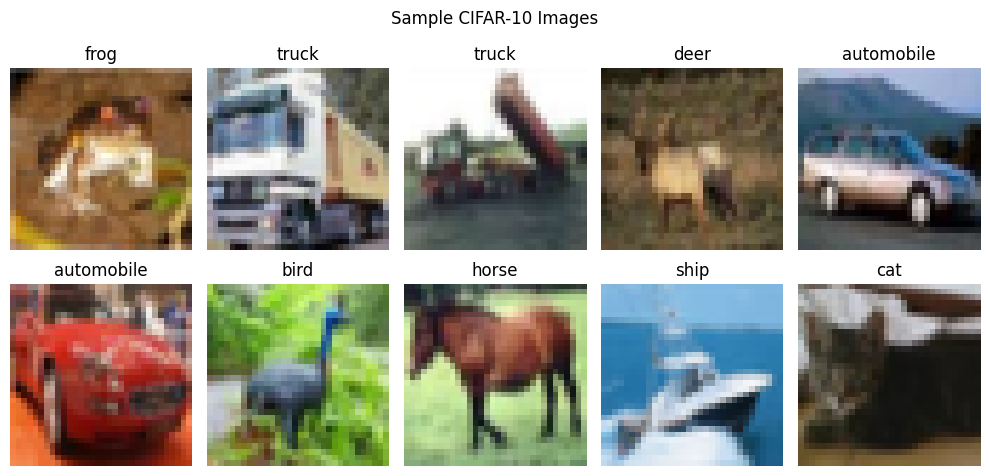

In [7]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(32, 32, 3))
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Images")
plt.tight_layout()
plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

In [10]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - loss: 2.2072 - sparse_categorical_accuracy: 0.1710 - val_loss: 1.9989 - val_sparse_categorical_accuracy: 0.2768
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - loss: 2.0173 - sparse_categorical_accuracy: 0.2329 - val_loss: 1.9472 - val_sparse_categorical_accuracy: 0.2808
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - loss: 1.9736 - sparse_categorical_accuracy: 0.2567 - val_loss: 1.9240 - val_sparse_categorical_accuracy: 0.3015
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 1.9686 - sparse_categorical_accuracy: 0.2627 - val_loss: 1.9274 - val_sparse_categorical_accuracy: 0.3037
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - loss: 1.9552 - sparse_categorical_accuracy: 0.2670 - val_loss: 1.9279 - val_sparse_categorical_accuracy: 0.3142
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 1.9400 - sparse_categorical_accuracy: 0.2746 - val_loss: 1.8780 - val_sparse_categoric

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8852 - sparse_categorical_accuracy: 0.3209

Test accuracy: 0.3212


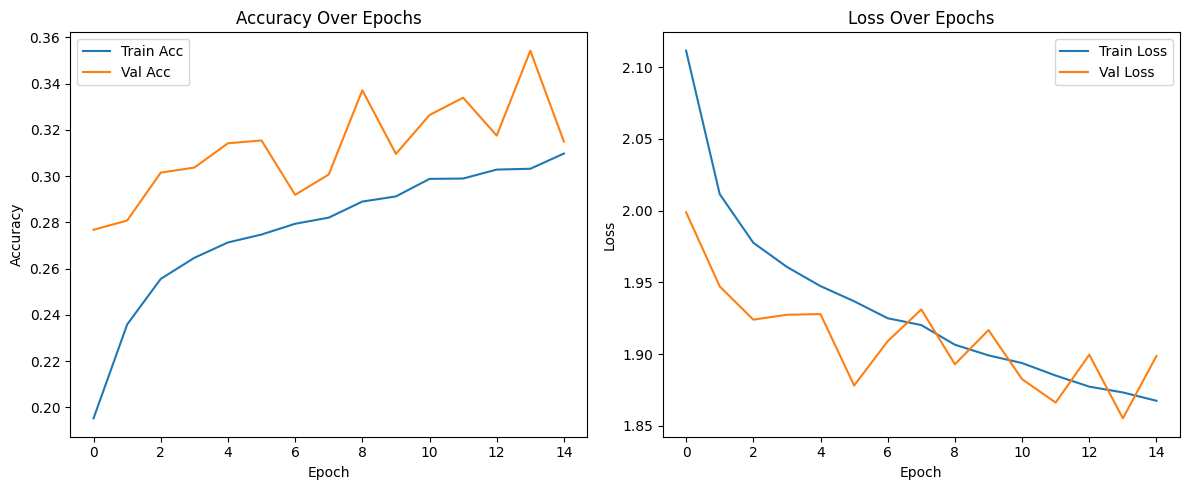

In [12]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Acc')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()